<a href="https://www.kaggle.com/code/germainenish/emotiondetection-cnn-tf?scriptVersionId=98273927" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

In [2]:
path="../input/face-expression-recognition-dataset/images/"

In [3]:
train_dgen= ImageDataGenerator(rescale= 1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip= True)
#train data upload
train_data= train_dgen.flow_from_directory(path+'train',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='categorical')
#test data upload
test_data= train_dgen.flow_from_directory(path+'validation',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


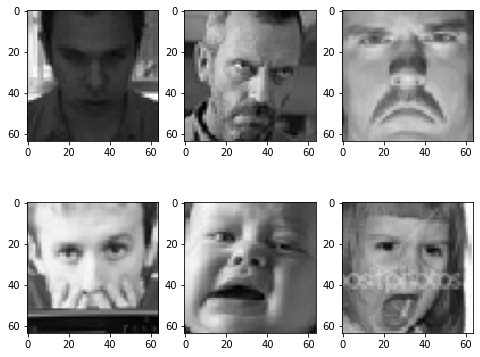

In [4]:
expression = 'angry'
plt.figure(figsize= (8,10))
for i in range(1,7,1):
    plt.subplot(3,3,i)
    img = load_img(path+'train/'+expression+ "/"+ os.listdir(path + "train/" + expression)[i],
                  target_size=(64,64))
    plt.imshow(img)
plt.show()

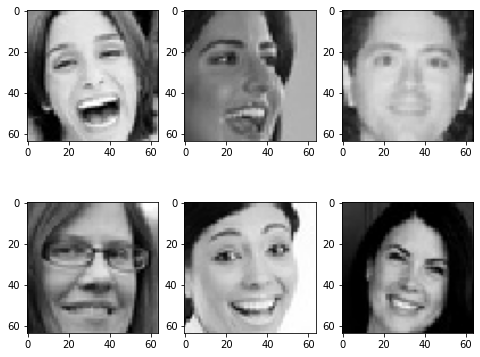

In [5]:
expression = 'happy'
plt.figure(figsize= (8,10))
for i in range(1,7,1):
    plt.subplot(3,3,i)
    img = load_img(path+'train/'+expression+ "/"+ os.listdir(path + "train/" + expression)[i],
                  target_size=(64,64))
    plt.imshow(img)
plt.show()

In [6]:
from keras.models import Model,Sequential
cnn= Sequential([
   #cnn
  keras.layers.Conv2D(filters=24,kernel_size=(3,3), activation='relu', input_shape=(64,64,3)),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
  keras.layers.Conv2D(filters=16,kernel_size=(5,5), activation='relu'),
  keras.layers.MaxPooling2D((2,2)),
  
  keras.layers.Conv2D(filters=25,kernel_size=(4,4), activation='relu'),
  keras.layers.MaxPooling2D((2,2)),
    
  #dense  
  keras.layers.Flatten(),
  keras.layers.Dense(20,activation='relu'),
  keras.layers.Dense(7,activation='softmax')
])

2022-06-13 17:47:31.553325: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )

In [8]:
cnn.fit(train_data,validation_data=test_data,epochs=30)

2022-06-13 17:47:32.028256: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
901/901 [==============================] - 252s 278ms/step - loss: 1.7649 - accuracy: 0.2828 - val_loss: 1.6424 - val_accuracy: 0.3651
Epoch 2/30
901/901 [==============================] - 105s 116ms/step - loss: 1.6142 - accuracy: 0.3682 - val_loss: 1.6033 - val_accuracy: 0.3783
Epoch 3/30
901/901 [==============================] - 107s 119ms/step - loss: 1.5560 - accuracy: 0.3952 - val_loss: 1.5463 - val_accuracy: 0.4032
Epoch 4/30
901/901 [==============================] - 102s 113ms/step - loss: 1.5089 - accuracy: 0.4154 - val_loss: 1.4763 - val_accuracy: 0.4331
Epoch 5/30
901/901 [==============================] - 100s 111ms/step - loss: 1.4631 - accuracy: 0.4351 - val_loss: 1.4442 - val_accuracy: 0.4483
Epoch 6/30
901/901 [==============================] - 101s 112ms/step - loss: 1.4301 - accuracy: 0.4523 - val_loss: 1.4234 - val_accuracy: 0.4591
Epoch 7/30
901/901 [==============================] - 99s 110ms/step - loss: 1.4075 - accuracy: 0.4593 - val_loss: 1.4059 - 